In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../../Modules')
import erqScaling
import erqMedSpec

#  resampling for LOF score of each bin 

from sklearn.neighbors import LocalOutlierFactor as LOF
cc=-1
from matplotlib import cm
nBoot=1000
nBin=8
LOFScoresMedianBins=np.zeros([nBoot,nBin])
opening_angle= np.deg2rad(20)
ERQ_Vector = np.array([1,1])/np.sqrt(2)
#  Obtaining Point A and B for the ERQ wedge
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
jj=-1
for k in [70, 100, 150, 200]:
    for s in tqdm(range(nBoot)):

        # Grawing two Gaussian samples
        data=np.random.multivariate_normal([0,0], [[1,0],[0,1]], 30000)

        data_norm = erqMedSpec.vectors_uniter(data)
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(data)
        LOFScores = -clf.negative_outlier_factor_
        theta = np.zeros([len(data)])
        for i in range(len(data)):
            theta[i] = np.arccos(np.dot(ERQ_Vector, data_norm[i,:]))

        # initializing 
        r2 = data[:,0]**2 + data[:,1]**2
        for b in range(nBin):
            if(b==0):
                mask =(r2>=rin[b]**2) & (r2<=rout[b]**2)
            else:
                mask =(r2>=rin[b]**2) & (r2<=rout[b]**2) & (theta<=opening_angle)
            if(np.sum(mask)==0):
                LOFScoresMedianBins[s,b]=np.nan
            else:
                LOFScoresMedianBins[s,b]=np.median(LOFScores[mask])
    np.savetxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k, LOFScoresMedianBins)


100%|██████████| 1000/1000 [29:50<00:00,  1.79s/it]


(1000, 8)
0 0.9982288045328933 1.0057573430664286
1 0.9999595710144558 1.0039325818096012
2 1.0007130107365982 1.005128547722073
3 1.0037987021870884 1.0108221185303852
4 1.0157840505733542 1.0371105363897382
5 1.0864530393798244 1.1740449439187006
6 1.5814488935772206 2.164706423130717
7 2.649700632131307 3.890841821938641


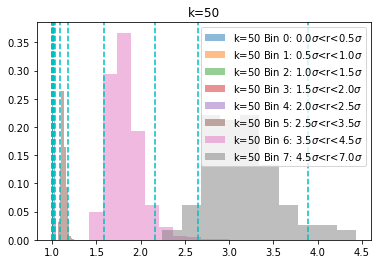

(1000, 8)
0 0.9977683831135435 1.0048701176952088
1 0.9994623617328818 1.0034604300353014
2 1.0005123061345778 1.004898932251327
3 1.0047841864133829 1.0125854267168652
4 1.0226724271355039 1.0476816764800796
5 1.113369120362282 1.2103901929158816
6 1.6671353500841886 2.1939861606769337
7 2.7494368338139865 3.9034108943425285


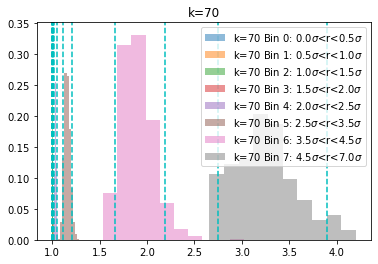

(1000, 8)
0 0.9967100431513226 1.0043598317199165
1 0.9988690216658991 1.0029719753828457
2 1.0005536882203037 1.0051459765897728
3 1.006793189837515 1.0159617825679812
4 1.0321123190168564 1.0622641427693464
5 1.1479719813564873 1.2526324050022564
6 1.751205462340373 2.261364625709815
7 2.8742701744370245 4.107284541722208


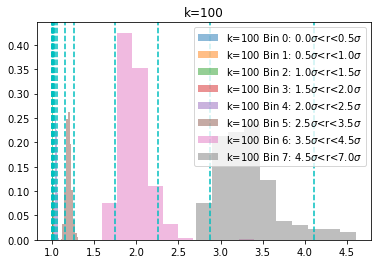

(1000, 8)
0 0.9961638213439289 1.0037175272457641
1 0.9981325366811138 1.0024717012852653
2 1.00078879128208 1.0060966357698673
3 1.0096807528836294 1.0221807981628228
4 1.0483371269908537 1.0838428424652953
5 1.1976319786181615 1.3058059503606398
6 1.8481754461817554 2.327550272605195
7 2.969708338064083 3.918193381803357


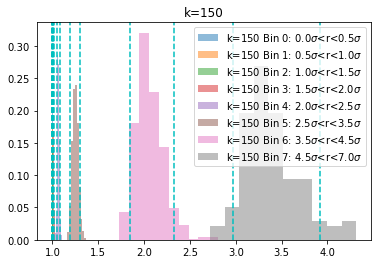

In [17]:
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
for k in [ 50,70, 100, 150]:
    LOFScoresMedianBins = np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    print(LOFScoresMedianBins.shape)
    P_all =[]
    med_bin=[]
    width= []

    for b in range(nBin):
        N, bins, patch=plt.hist(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], bins=10)
        med_bin.append((bins[:-1] + bins[1:])/2)
        width.append(bins[1] - bins[0])
        P_all.append(N/np.sum(N))
        plt.clf()
        plt.cla()

    for b in range(nBin):
        plt.bar(med_bin[b], P_all[b], width=width[b],  linewidth=0.5, 
                alpha=.5, label=r'k=%d Bin %d: %.1f$\sigma$<r<%.1f$\sigma$'%(k, b, rin[b],rout[b]))
        u= np.percentile(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], 95) 
        l= np.percentile(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], 5) 
        print(b,l,u)
        plt.axvline(x=l, c='c', ls='--')
        plt.axvline(x=u, c='c', ls='--')
    plt.legend()
    plt.title('k=%d'%k)
    plt.savefig('LOF_1G_MOK_PDF-k-%d.png'%k, dpi=200)
    plt.show()

k=50 b=0 l=9.782e-04 m=1.002e+00 u=1.099e-03
k=50 b=1 l=5.664e-04 m=1.002e+00 u=6.051e-04
k=50 b=2 l=5.745e-04 m=1.003e+00 u=6.427e-04
k=50 b=3 l=9.775e-04 m=1.007e+00 u=9.522e-04
k=50 b=4 l=2.647e-03 m=1.025e+00 u=3.192e-03
k=50 b=5 l=1.181e-02 m=1.124e+00 u=1.249e-02
k=50 b=6 l=7.202e-02 m=1.800e+00 u=8.212e-02
k=50 b=7 l=1.906e-01 m=3.099e+00 u=1.592e-01

k=70 b=0 l=9.796e-04 m=1.001e+00 u=1.135e-03
k=70 b=1 l=5.935e-04 m=1.001e+00 u=5.769e-04
k=70 b=2 l=6.053e-04 m=1.003e+00 u=6.214e-04
k=70 b=3 l=1.072e-03 m=1.008e+00 u=1.342e-03
k=70 b=4 l=3.482e-03 m=1.033e+00 u=4.023e-03
k=70 b=5 l=1.491e-02 m=1.157e+00 u=1.377e-02
k=70 b=6 l=7.331e-02 m=1.883e+00 u=7.908e-02
k=70 b=7 l=1.343e-01 m=3.205e+00 u=1.577e-01

k=100 b=0 l=1.039e-03 m=1.000e+00 u=1.092e-03
k=100 b=1 l=5.503e-04 m=1.001e+00 u=5.174e-04
k=100 b=2 l=6.769e-04 m=1.003e+00 u=6.278e-04
k=100 b=3 l=1.360e-03 m=1.011e+00 u=1.184e-03
k=100 b=4 l=4.295e-03 m=1.046e+00 u=4.223e-03
k=100 b=5 l=1.272e-02 m=1.194e+00 u=1.509e-02
k=

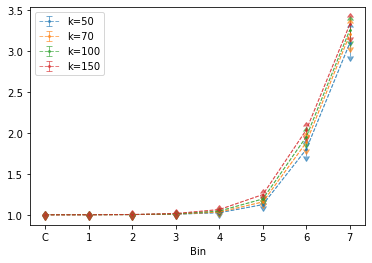

In [18]:
# Plotting 2D Mock LOF error bars 
r1=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
r2=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
P_all =[]
med_bin=[]
width= []
c= ['C0', 'C1', 'C2', 'C3', 'C4']
cind=-1
for k in [50, 70,100,150]:
    DistLOFMedBin=np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin):
        
        l[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],32)
        u[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],68)
        LOFScoreMedian[b] = np.nanmedian(DistLOFMedBin[:,b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]
        print('k=%d b=%d l=%.3e m=%.3e u=%.3e'%(k, b, l[b],LOFScoreMedian[b],u[b]))
    print('')
    cind+=1
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=l, uplims=False, lolims=True, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=u, uplims=True, lolims=False, marker='o', lw=1, ls='--',
             markersize=1, alpha =0.6, c=c[cind])
plt.xlabel('Bin')
plt.legend()
plt.savefig('LOF_MOK_2D-G1-errorbar.png', dpi=200, bbox_inches='tight')
plt.show()


In [19]:
! cp  LOF_MOK_2D-G1-errorbar.png ../../../erqPaper/fig